In [1]:
import numpy as np
import pandas as pd 
from scipy.stats import norm,t
import matplotlib.pyplot as plt

# Q1

Question 1 can be found in our Rmarkdown sheet. 

# Q2

## 2.1

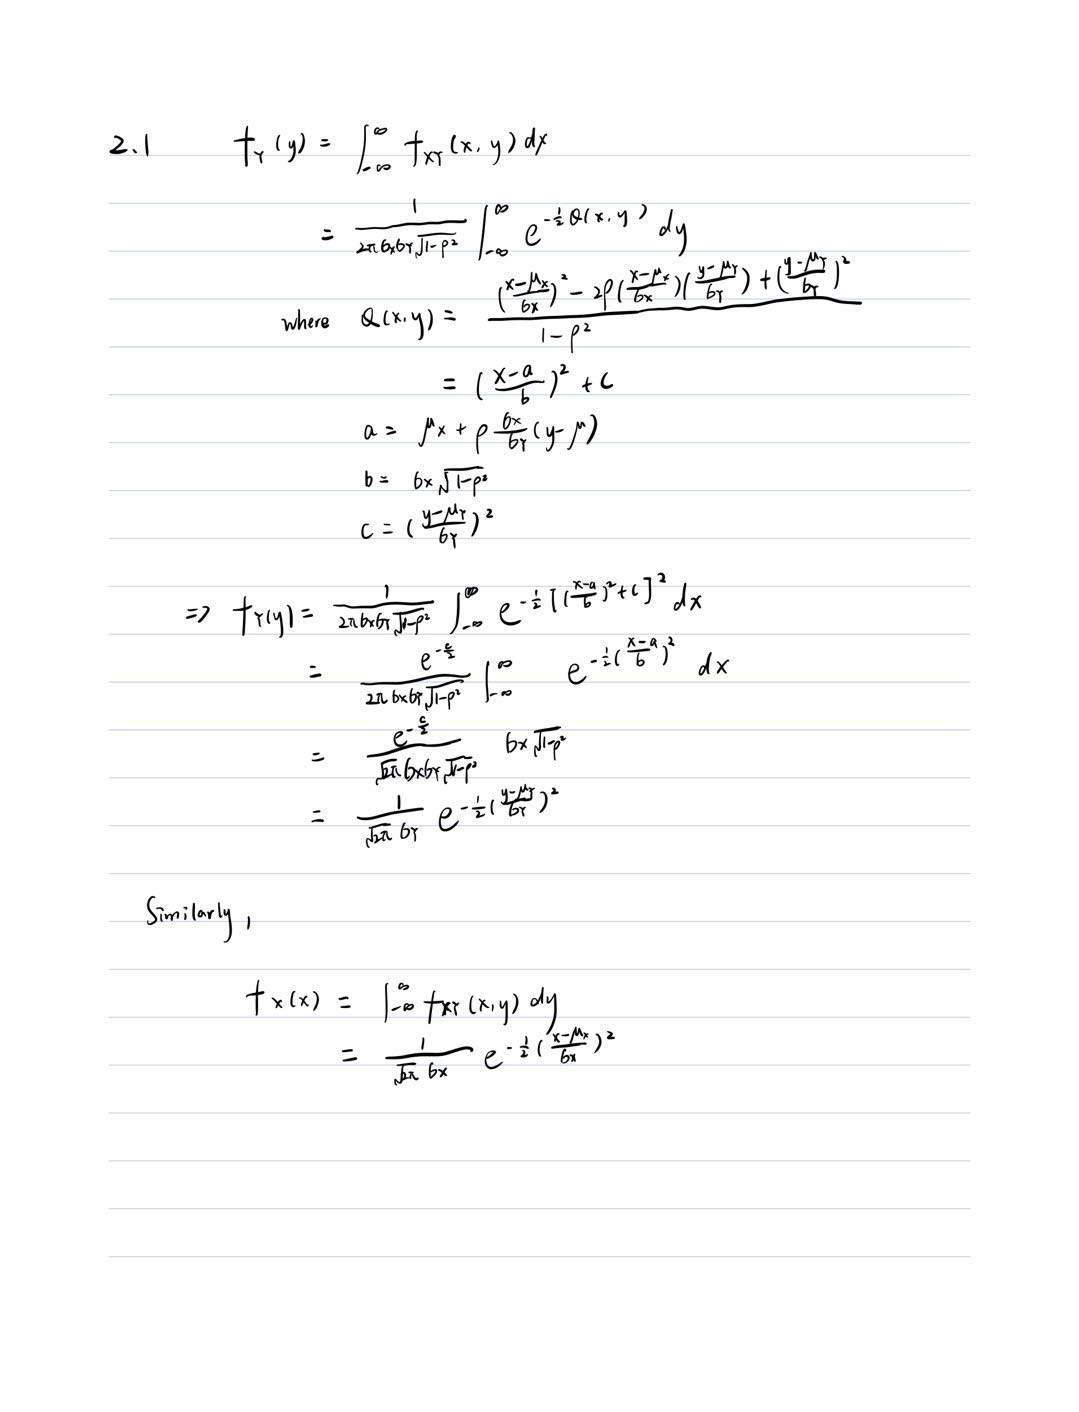

In [2]:
from IPython.display import Image
Image('2_1.jpg')

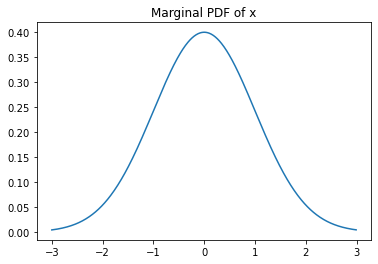

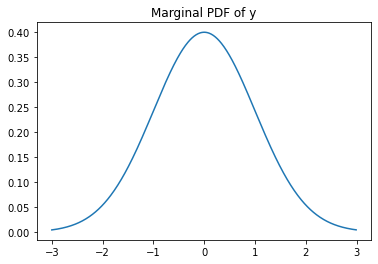

In [3]:
x = np.arange(-3, 3, 0.01)
y = np.arange(-3, 3, 0.01)
  
# Calculating mean and standard deviation
mu_x,mu_y,sig_x,sig_y = 0,0,1,1
  
plt.figure()
plt.plot(x, norm.pdf(x, mu_x, sig_x))
plt.title('Marginal PDF of x')
plt.show()
plt.figure()
plt.plot(y, norm.pdf(y, mu_y, sig_y))
plt.title('Marginal PDF of y')
plt.show()

**Those marginal pdfs are identical with Normal(0,1) pdf**

## 2.2

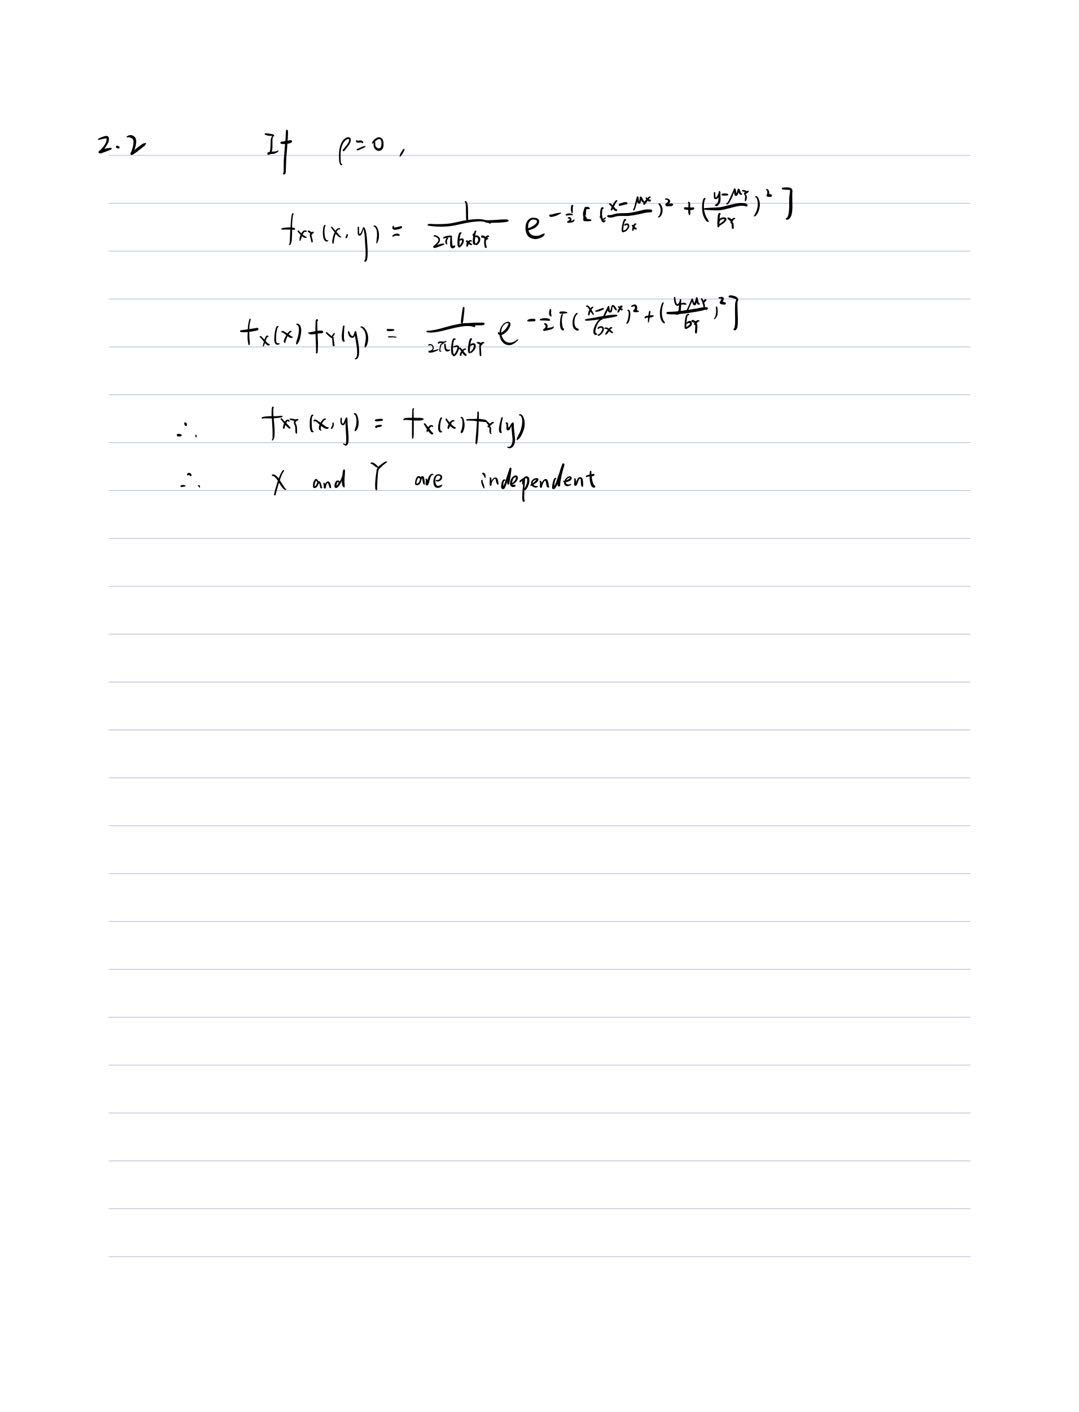

In [4]:
Image('2_2.jpg')

## 2.3

Given $Y=1$:

$E[X|Y=1]=\mu_x+\rho\sigma_x\frac{1-\mu_y}{\sigma_y}\$

$Var[X|Y=1]=(1-\rho^2)\sigma_x^2$

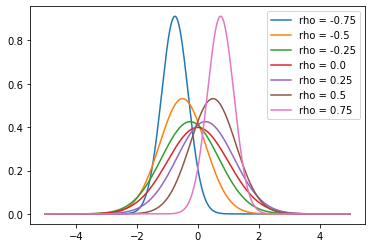

In [5]:
rho_grid = np.arange(-0.75,1,0.25)
x = np.arange(-5, 5, 0.01)
mu_x,mu_y,sig_x,sig_y = 0,0,1,1
plt.figure()
for rho in rho_grid:
    mu = mu_x+rho*sig_x*(1-mu_y)/sig_y
    sig = (1-rho**2)*sig_x**2
    plt.plot(x, norm.pdf(x, mu, sig),label=f'rho = {rho}')
plt.legend()    
plt.show()

**The negative and positive $\rho$ both help to predict X since they indicate a linear relation bwtween X and Y. Larger $\rho$ implies a stronger linearity. It is hard to predict X if X and Y are independent, i.e. $\rho=0$.**

# Q3
## 3.1

In [6]:
np.random.seed(0)
lam = 10
x = np.random.exponential(1/lam,100)

$L = \lambda e^{(-\lambda{x_1})}\lambda e^{(-\lambda{x_1})}...\lambda e^{(-\lambda{x_100})} = \lambda^{100} e^{(-\lambda(x_1+x_2+...+x_{100}))}$

$L'=\ln{L}=100\ln{\lambda}-\lambda\sum_{i=0}^{100}x_i$ 

$\frac{\partial L'}{partial \lambda} = \frac{100}{\lambda}-\sum_{i=0}^{100}x_i = 0$

$\lambda = \frac{100}{\sum_{i=0}^{100}x_i}$

In [7]:
lam = 100/x.sum()
print(f'extimated lambda is {lam}')

extimated lambda is 10.885557365453474


**The estimated value of $\lambda$ (10.89) is close to true $\lambda$ (10)**

## 3.2

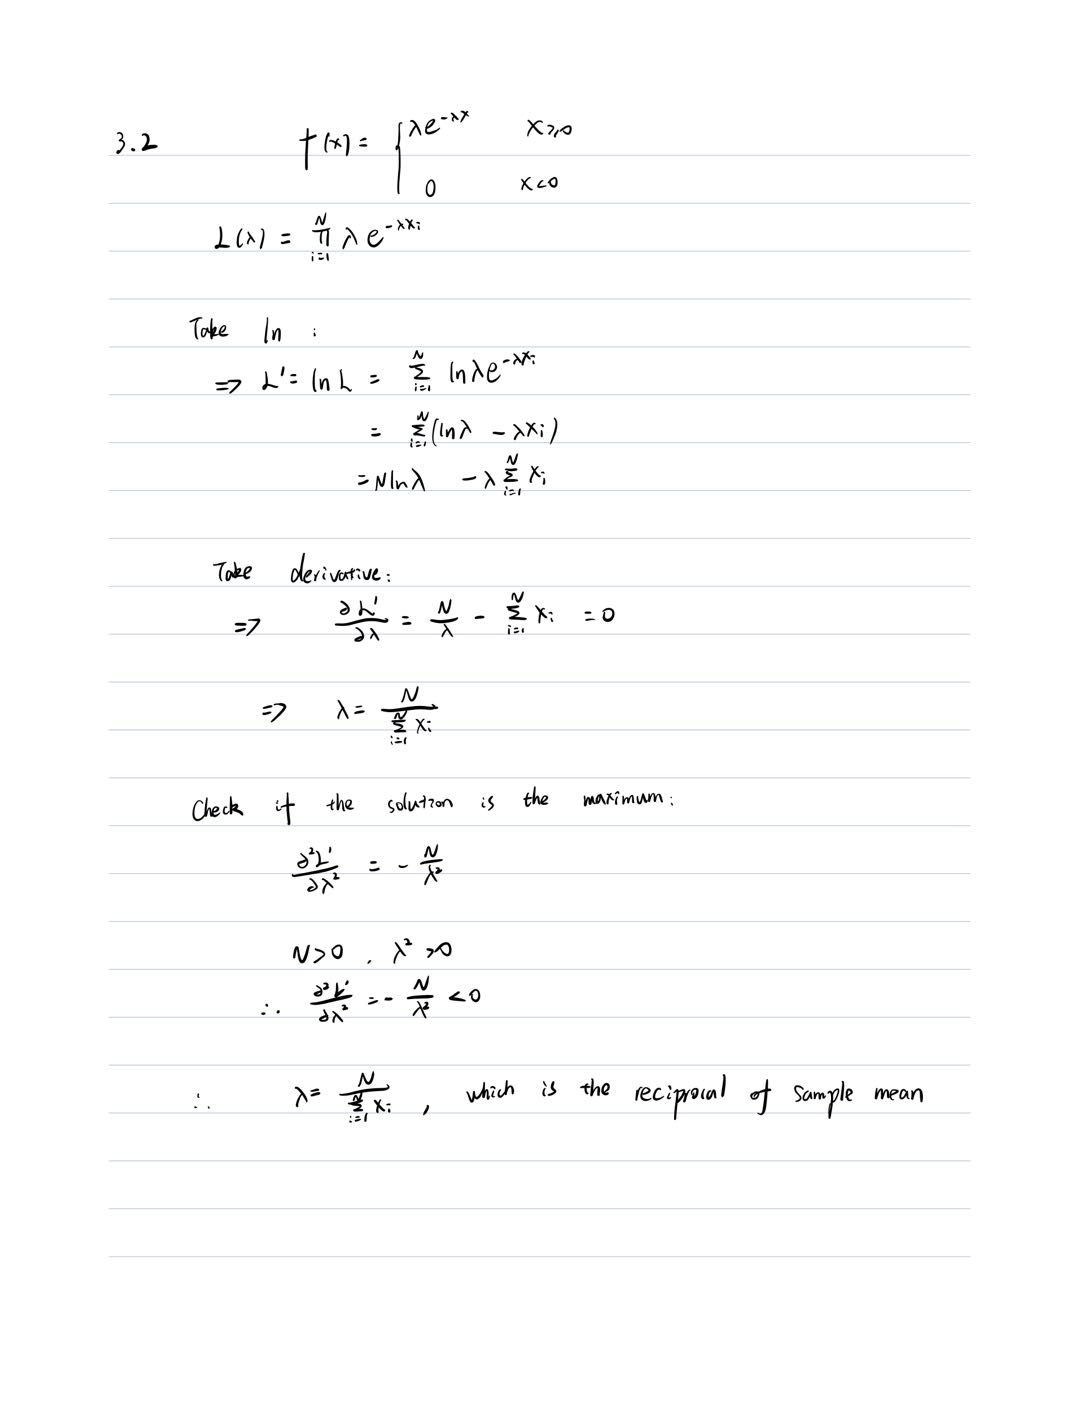

In [8]:
Image('3_2.jpg')

# Q4

## Case 1

In [9]:
seed_grid = np.arange(1,1001)
coverage = 0

for i in seed_grid:
    np.random.seed(i)
    x = np.random.normal(0,1,4)
    mu = x.mean()
    std = x.std()
    up = mu+1.6449*std/np.sqrt(4)
    lower = mu-1.6449*std/np.sqrt(4)
    if up>=0 and lower<=0:
        coverage += 1  
    else:
        pass
ef = coverage/len(seed_grid)
print(f'The empirical frequency of coverage is {ef}')

The empirical frequency of coverage is 0.749


## Case 2

In [10]:
seed_grid = np.arange(1,1001)
coverage = 0
width = []

for i in seed_grid:
    np.random.seed(i)
    x = np.random.normal(0,1,4)
    mu = x.mean()
    std = x.std()
    interval = t.interval(alpha=0.95, df=3, loc=mu, scale=std) 
    if interval[1]>=0 and interval[0]<=0:
        coverage += 1
    else:
        pass
    width.append(interval[1]-interval[0])
ef = coverage/len(seed_grid)
print(f'The empirical frequency of coverage is {ef}')

C:\Users\GCM\AppData\Local\Temp\ipykernel_23480\3993943170.py:10: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  interval = t.interval(alpha=0.95, df=3, loc=mu, scale=std)


The empirical frequency of coverage is 0.988


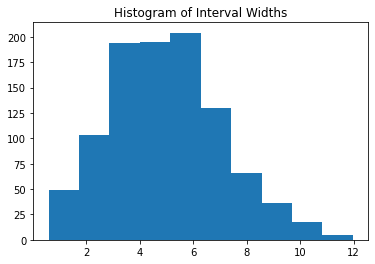

In [11]:
plt.figure()
plt.hist(width)
plt.title('Histogram of Interval Widths')
plt.show()

## Case 3

In [12]:
seed_grid = np.arange(1,1001)
coverage = 0
width = []

for i in seed_grid:
    np.random.seed(i)
    x = np.random.normal(0,1,4)
    mu = x.mean()
    std = x.std()
    interval = norm.interval(alpha=0.95, loc=mu, scale=std)
    if interval[1]>=0 and interval[0]<=0:
        coverage += 1
    else:
        pass
    width.append(interval[1]-interval[0])
ef = coverage/len(seed_grid)
print(f'The empirical frequency of coverage is {ef}')

C:\Users\GCM\AppData\Local\Temp\ipykernel_23480\1891025027.py:10: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  interval = norm.interval(alpha=0.95, loc=mu, scale=std)


The empirical frequency of coverage is 0.957


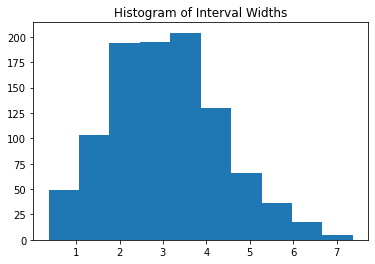

In [13]:
plt.figure()
plt.hist(width)
plt.title('Histogram of Interval Widths')
plt.show()

**Case 2 has the highest empirical frequency of coverage when exact small sample CI is computed using t-distribution. That makes sense since the sample is very small (N=4). When using approximate large-sample CI in case 3, the empirical frequency decreases.**